In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

In [2]:
#import the cleaned data
data = pd.read_csv('datacleanedup.csv')
data

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill_liters,specials,gas_type,refill_gas,fuel_price_liter,fuel_consume_km,trip_cost,cost_km
0,28.0,5.0,26,21.5,12,0,0,0,45.0,other,E10,E10,1.38,1.4000,1.960000,0.070000
1,12.0,4.2,30,21.5,13,0,0,0,0.0,other,E10,E10,1.38,0.5040,0.254016,0.021168
2,11.2,5.5,38,21.5,15,0,0,0,0.0,other,E10,E10,1.38,0.6160,0.379456,0.033880
3,12.9,3.9,36,21.5,14,0,0,0,0.0,other,E10,E10,1.38,0.5031,0.253110,0.019621
4,18.5,4.5,46,21.5,15,0,0,0,0.0,other,E10,E10,1.38,0.8325,0.693056,0.037463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,0.0,0.0,39,0.0,18,0,0,0,0.0,other,SP98,SP98,1.46,0.0000,0.000000,0.045345
750,0.0,0.0,38,0.0,31,1,0,0,0.0,AC,SP98,SP98,1.46,0.0000,0.000000,0.045345
751,0.0,0.0,45,0.0,19,0,0,0,0.0,other,SP98,SP98,1.46,0.0000,0.000000,0.045345
752,0.0,0.0,42,0.0,31,1,0,0,0.0,AC,SP98,SP98,1.46,0.0000,0.000000,0.045345


In [3]:
numerical = data.select_dtypes(np.number)

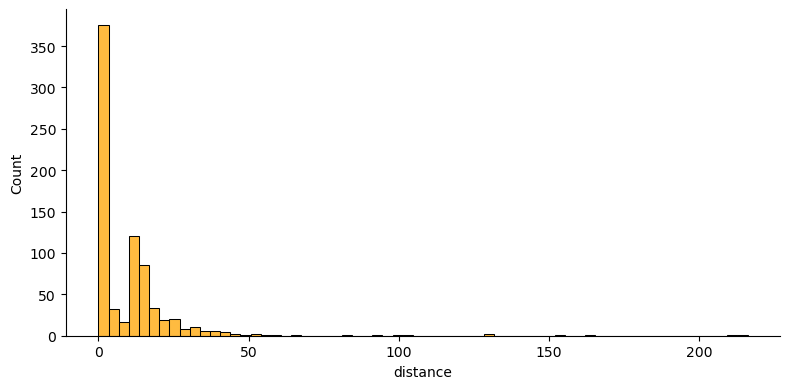

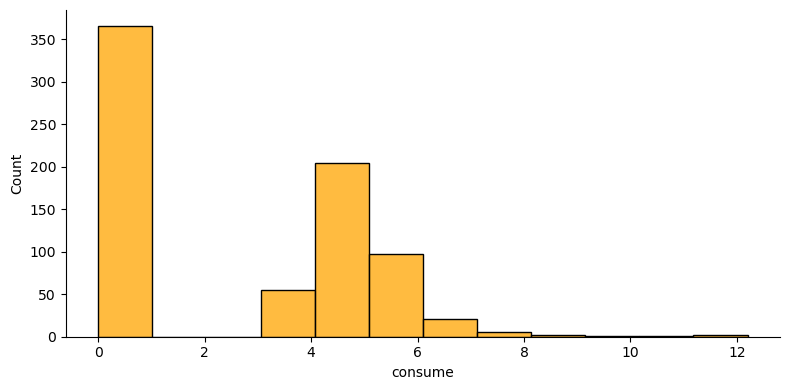

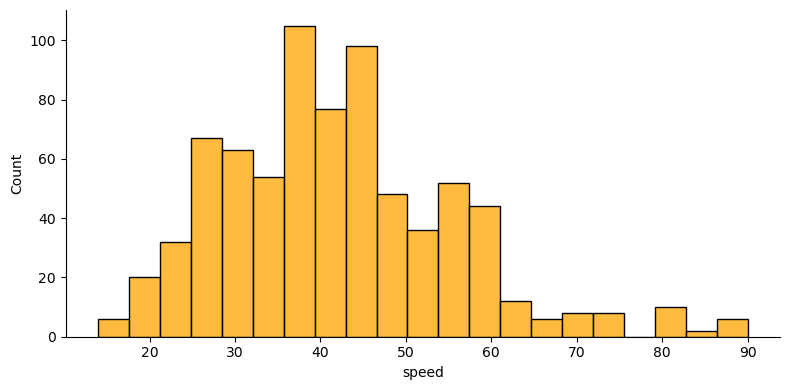

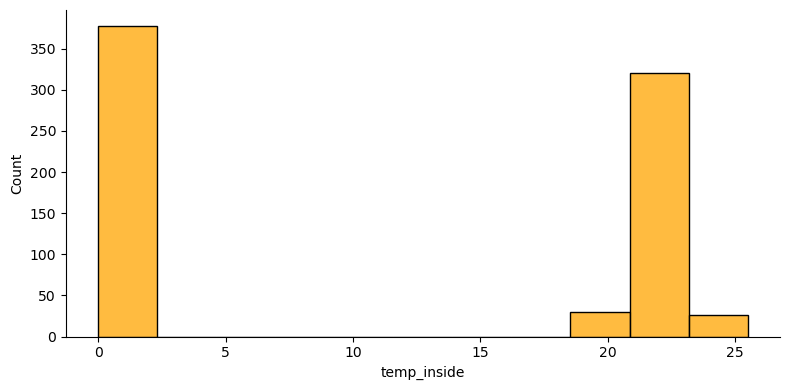

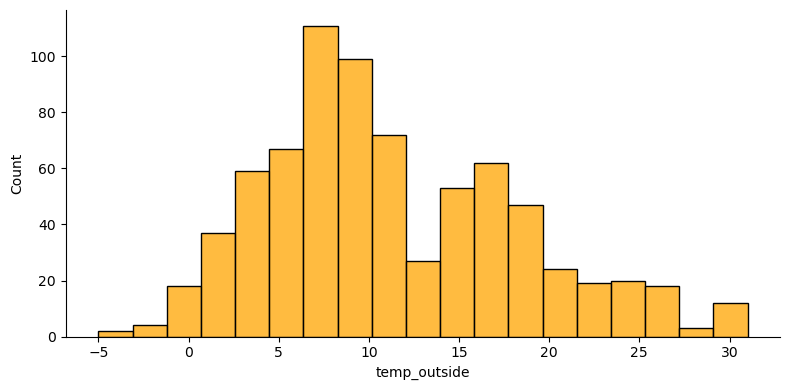

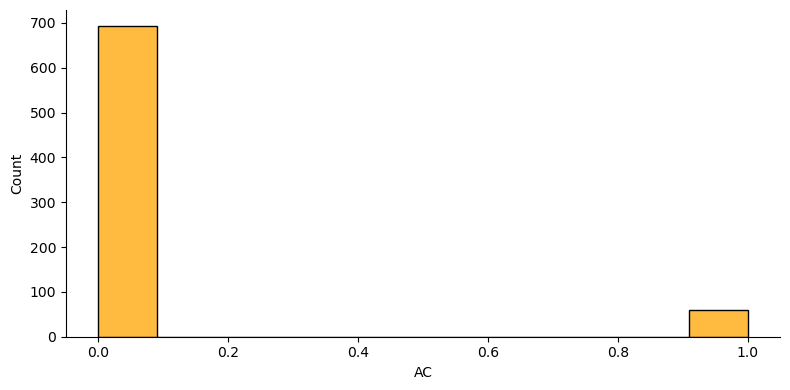

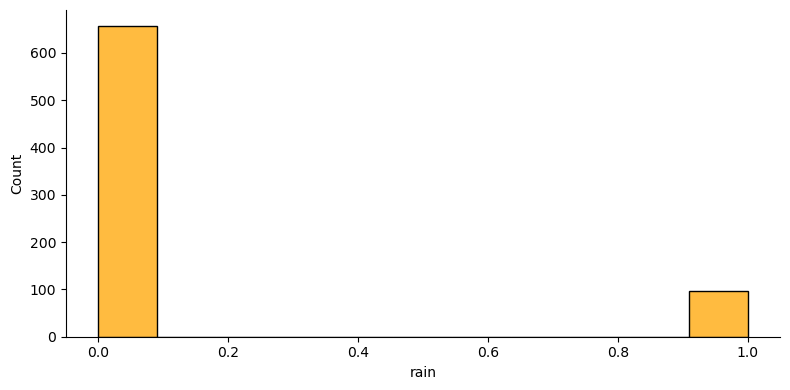

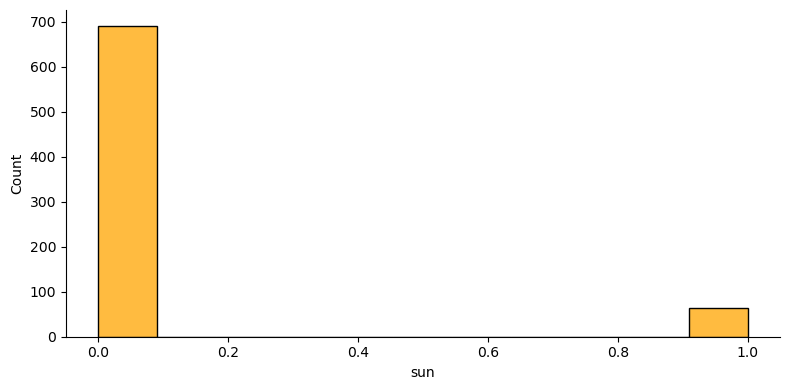

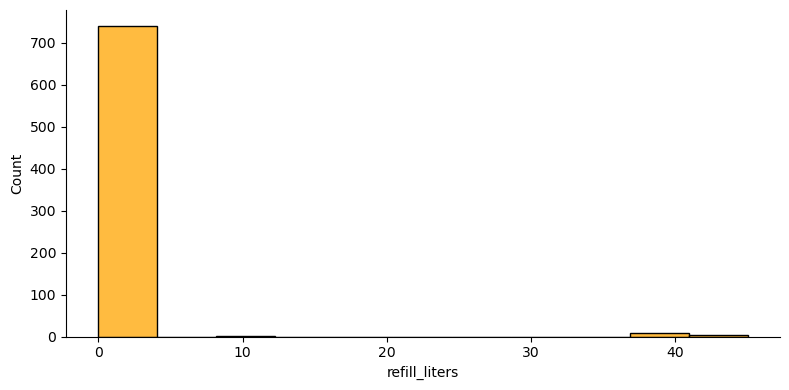

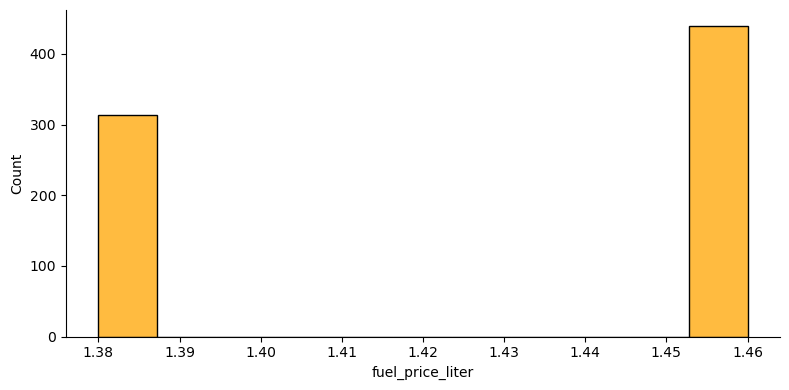

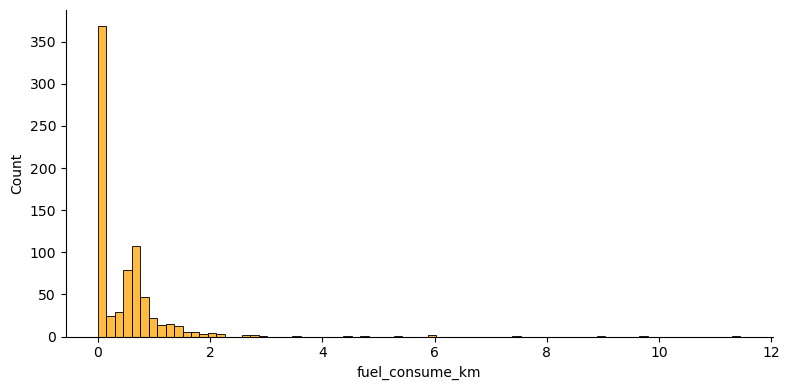

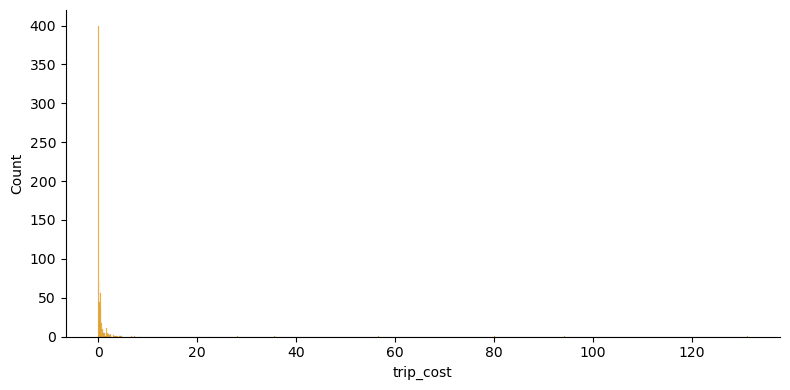

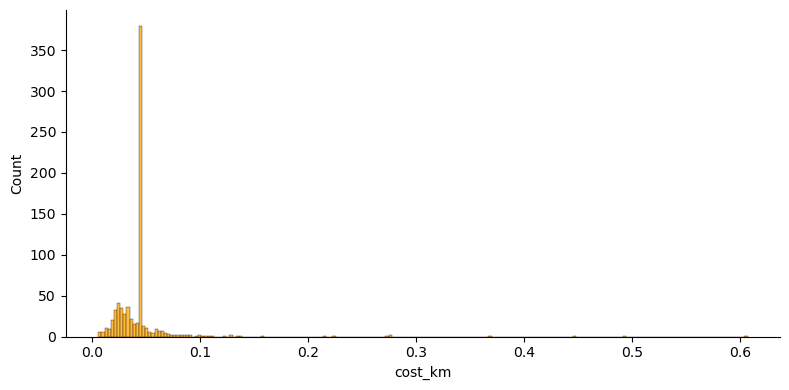

In [4]:
#Creating distribution plots for the numerical variables
for feature in numerical:
    sns.displot(data=data, x=feature, height=4, aspect=2, color= 'orange')

In [5]:
mean_distance_by_type = data.groupby('gas_type')['distance'].mean().reset_index()
mean_distance_by_type

,gas_type,distance
0,E10,10.749682
1,SP98,9.658864


<Figure size 800x600 with 0 Axes>

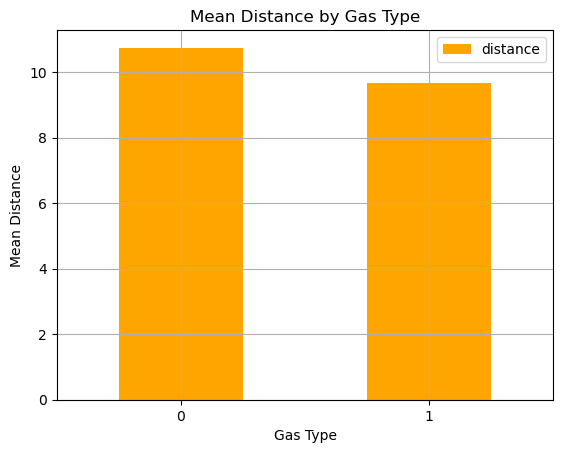

In [6]:
# Plotting the bar plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as per your preference

mean_distance_by_type.plot(kind='bar', color='orange')

plt.xlabel('Gas Type')
plt.ylabel('Mean Distance')
plt.title('Mean Distance by Gas Type')
plt.grid(True)
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [7]:
mean_consumption_by_type = data.groupby('gas_type')['consume'].mean().reset_index()
mean_consumption_by_type

,gas_type,consume
0,E10,2.512739
1,SP98,2.538636


<Figure size 800x600 with 0 Axes>

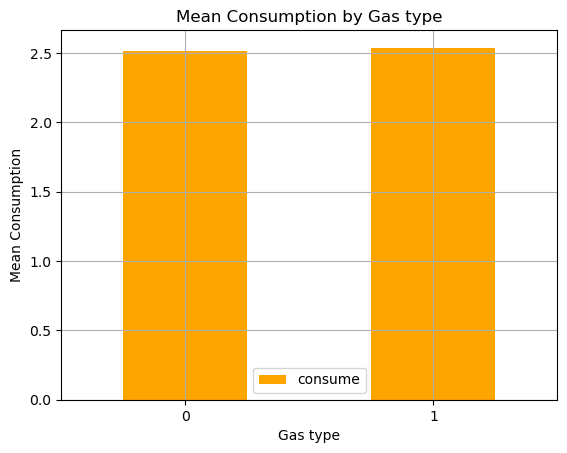

In [8]:
plt.figure(figsize=(8, 6))

mean_consumption_by_type.plot.bar(color='orange')

plt.xlabel('Gas type')
plt.ylabel('Mean Consumption')
plt.title('Mean Consumption by Gas type')
plt.grid(True)
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


In [9]:
mean_consumption_km_by_type = data.groupby('gas_type')['fuel_consume_km'].mean().reset_index()
mean_consumption_km_by_type

,gas_type,fuel_consume_km
0,E10,0.514106
1,SP98,0.457875


In [10]:
mean_speed_by_type = data.groupby('gas_type')['speed'].mean().reset_index()
mean_speed_by_type

,gas_type,speed
0,E10,43.601911
1,SP98,40.920455


In [11]:
mean_consumption_km_by_distance_by_type = data.groupby(['gas_type', 'distance'])['fuel_consume_km'].mean().reset_index()
mean_consumption_km_by_distance_by_type

,gas_type,distance,fuel_consume_km
0,E10,0.0,0.0000
1,E10,1.7,0.1836
2,E10,2.0,0.1410
3,E10,4.1,0.2214
4,E10,4.2,0.2114
...,...,...,...
208,SP98,56.1,2.6928
209,SP98,153.5,7.5215
210,SP98,162.7,8.9485
211,SP98,211.0,9.7060


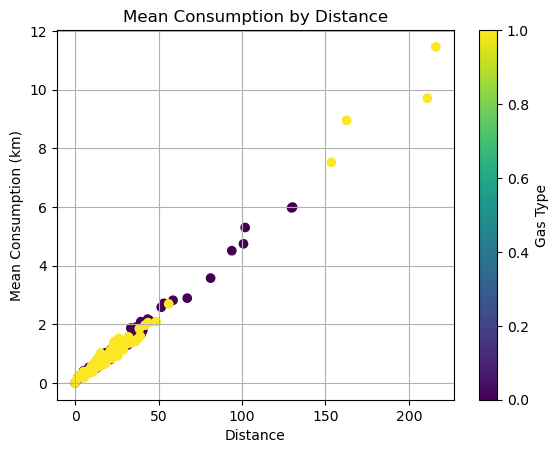

In [15]:
# Create numerical labels for gas types
labels, _ = pd.factorize(mean_consumption_km_by_distance_by_type['gas_type'])

# Scatter plot
plt.scatter(mean_consumption_km_by_distance_by_type['distance'], mean_consumption_km_by_distance_by_type['fuel_consume_km'],
            c=labels, cmap='viridis')

# Set labels and title
plt.xlabel('Distance')
plt.ylabel('Mean Consumption (km)')
plt.title('Mean Consumption by Distance')

# Show color legend
plt.colorbar(label='Gas Type')

# Show the plot
plt.grid(True)
plt.show()


In [16]:
data['speed']

KeyError: 'speed'

In [17]:
mean_consumption_km_by_speed_by_type = data.groupby(['gas_type','speed'])['fuel_consume_km'].mean().reset_index()

KeyError: 'speed'

In [ ]:
# Plotting the scatterplot
plt.figure(figsize=(10, 6))

for gas_type in mean_consumption_km_by_speed_by_type['gas_type'].unique():
    data = mean_consumption_km_by_speed_by_type[mean_consumption_km_by_speed_by_type['gas_type'] == gas_type]
    plt.scatter(data['speed'], data['fuel_consume_km'], label=gas_type)

plt.xlabel('Speed')
plt.ylabel('Mean Consumption km')
plt.title('Mean Consumption by Speed by Gas Type')
plt.legend()
plt.grid(True)
plt.show()